# _*TALLER INTELIGENCIA DE NEGOCIOS*_ (Clustering con K-Means)
## _Integrantes_
- Diego Olmedo
- Nicolas Wilches
- Mariana Chacon
- Juan Mateus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/juanpablo130502/TallerDatasetTitanic_BI/refs/heads/main/Data/dataset_kmeans_19022025.csv"
df = pd.read_csv(url, delimiter=";")
print(df.head(5))

   Edad  Gasto Mensual (USD)  Compras Mensuales
0    56                  714                 24
1    69                  115                  3
2    46                  698                 13
3    32                  653                  7
4    60                  486                 25


## Analisis Exporatorio de Datos (AED)

In [3]:
df.describe()

,Edad,Gasto Mensual (USD),Compras Mensuales
count,10000.000000,10000.000000,10000.00000
mean,44.021700,528.553900,15.40700
std,15.203998,275.265567,8.60825
min,18.000000,50.000000,1.00000
25%,31.000000,291.000000,8.00000
50%,44.000000,530.000000,15.00000
75%,57.000000,767.000000,23.00000
max,70.000000,1000.000000,30.00000


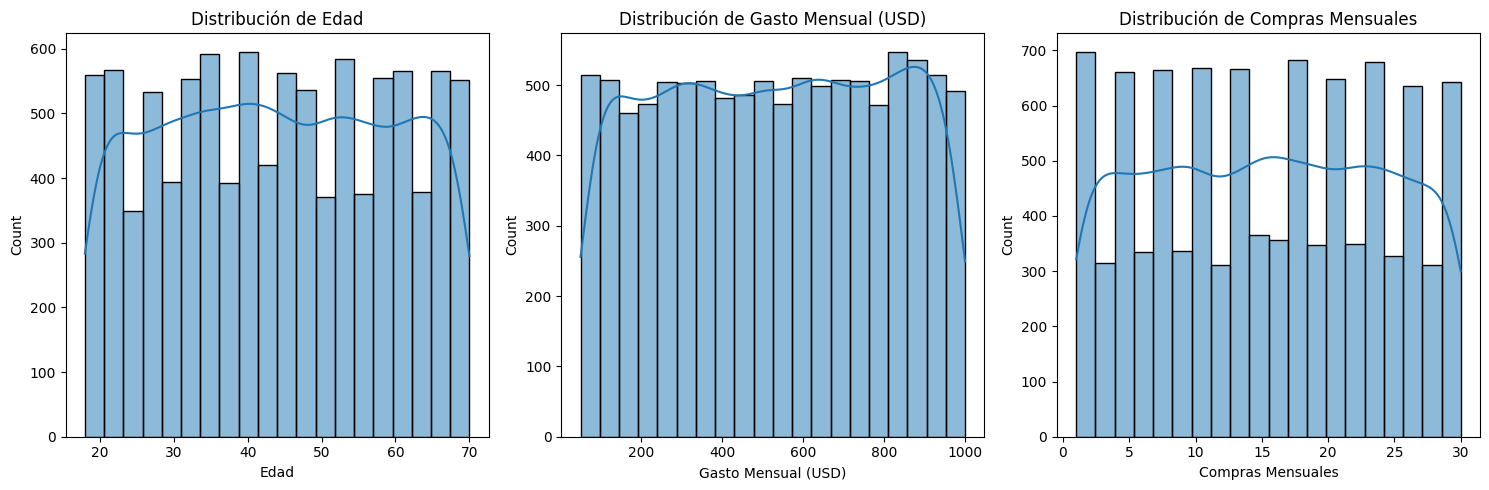

In [4]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

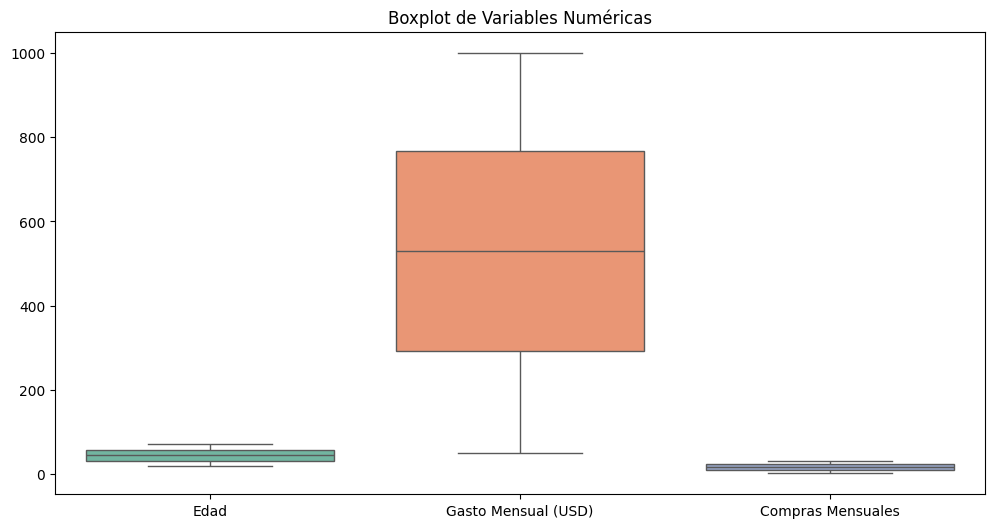

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot de Variables Numéricas")
plt.show()

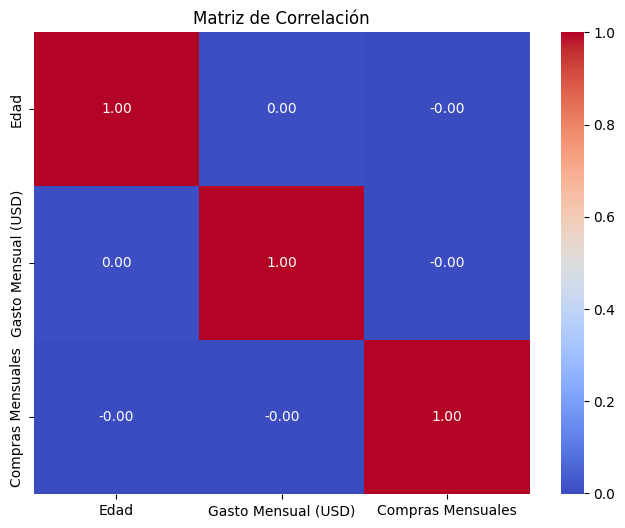

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()